## Basic EDA 

In [1]:
library(ggplot2) 

In [2]:
?diamonds

- `Format`
A data frame with 53940 rows and 10 variables:

- `price`
price in US dollars ($326–$18,823)

- `carat`
weight of the diamond (0.2–5.01)

- `cut`
quality of the cut (Fair, Good, Very Good, Premium, Ideal)

- `color`
diamond colour, from D (best) to J (worst)

- `clarity`
a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

- `x`
length in mm (0–10.74)

- `y`
width in mm (0–58.9)

- `z`
depth in mm (0–31.8)

- `depth`
total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43–79)

- `table`
width of top of diamond relative to widest point (43–95)

In [3]:
dim(diamonds)

[1] 53940    10

In [4]:
str(diamonds)

tibble[,10] [53,940 x 10] (S3: tbl_df/tbl/data.frame)
 $ carat  : num [1:53940] 0.23 0.21 0.23 0.29 0.31 0.24 0.24 0.26 0.22 0.23 ...
 $ cut    : Ord.factor w/ 5 levels "Fair"<"Good"<..: 5 4 2 4 2 3 3 3 1 3 ...
 $ color  : Ord.factor w/ 7 levels "D"<"E"<"F"<"G"<..: 2 2 2 6 7 7 6 5 2 5 ...
 $ clarity: Ord.factor w/ 8 levels "I1"<"SI2"<"SI1"<..: 2 3 5 4 2 6 7 3 4 5 ...
 $ depth  : num [1:53940] 61.5 59.8 56.9 62.4 63.3 62.8 62.3 61.9 65.1 59.4 ...
 $ table  : num [1:53940] 55 61 65 58 58 57 57 55 61 61 ...
 $ price  : int [1:53940] 326 326 327 334 335 336 336 337 337 338 ...
 $ x      : num [1:53940] 3.95 3.89 4.05 4.2 4.34 3.94 3.95 4.07 3.87 4 ...
 $ y      : num [1:53940] 3.98 3.84 4.07 4.23 4.35 3.96 3.98 4.11 3.78 4.05 ...
 $ z      : num [1:53940] 2.43 2.31 2.31 2.63 2.75 2.48 2.47 2.53 2.49 2.39 ...


1. `Feature` 9 in total, `Target` 'price'
2. `Cat` 'cut', 'color', 'clarity' All three vars have an order ➡️ Spearman's Correalation
3. `Con` Others 6개 ➡️ Scaling
4. x, y, z, depth ➡️ Renaming
5. x, y, z, depth, table, carot ➡️ necessary to check the Pearson's correlation coefficient (According to the domain)

In [5]:
summary(diamonds)

     carat               cut        color        clarity          depth      
 Min.   :0.2000   Fair     : 1610   D: 6775   SI1    :13065   Min.   :43.00  
 1st Qu.:0.4000   Good     : 4906   E: 9797   VS2    :12258   1st Qu.:61.00  
 Median :0.7000   Very Good:12082   F: 9542   SI2    : 9194   Median :61.80  
 Mean   :0.7979   Premium  :13791   G:11292   VS1    : 8171   Mean   :61.75  
 3rd Qu.:1.0400   Ideal    :21551   H: 8304   VVS2   : 5066   3rd Qu.:62.50  
 Max.   :5.0100                     I: 5422   VVS1   : 3655   Max.   :79.00  
                                    J: 2808   (Other): 2531                  
     table           price             x                y         
 Min.   :43.00   Min.   :  326   Min.   : 0.000   Min.   : 0.000  
 1st Qu.:56.00   1st Qu.:  950   1st Qu.: 4.710   1st Qu.: 4.720  
 Median :57.00   Median : 2401   Median : 5.700   Median : 5.710  
 Mean   :57.46   Mean   : 3933   Mean   : 5.731   Mean   : 5.735  
 3rd Qu.:59.00   3rd Qu.: 5324   3rd Qu.:

In [6]:
sum( is.na(diamonds) ) # doesn`t have the Missing Values

[1] 0

### Rename
- `x`
length in mm (0–10.74) **ㅡ>** `length`

- `y`
width in mm (0–58.9) **ㅡ>** `width`

- `z`
depth in mm (0–31.8) **ㅡ>** `depth`

- `depth`
total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43–79) **ㅡ>** `totdep`


In [7]:
names(diamonds)[c(5,8:10)]<-c("totdep", "length", "width", "depth")
colnames(diamonds)

[1] "carat"   "cut"     "color"   "clarity" "totdep"  "table"   "price"  
 [8] "length"  "width"   "depth"

## EDA for Continuous variables 
- `feature` 'carat'(1) , 'totdep'(5), 'table'(6), 'length'(8), 'width'(9), 'depth'(10)
- `target` 'price'(7)

### Correlation

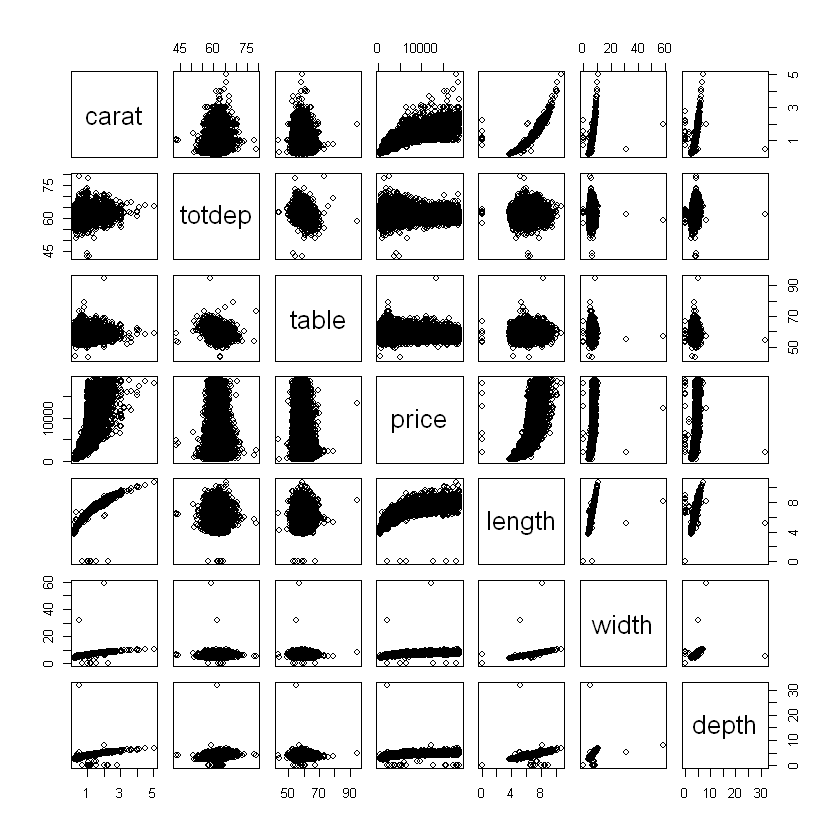

In [9]:
cont<-data.frame( diamonds[,c(1,5:10)])  
pairs(cont)

corrplot 0.92 loaded


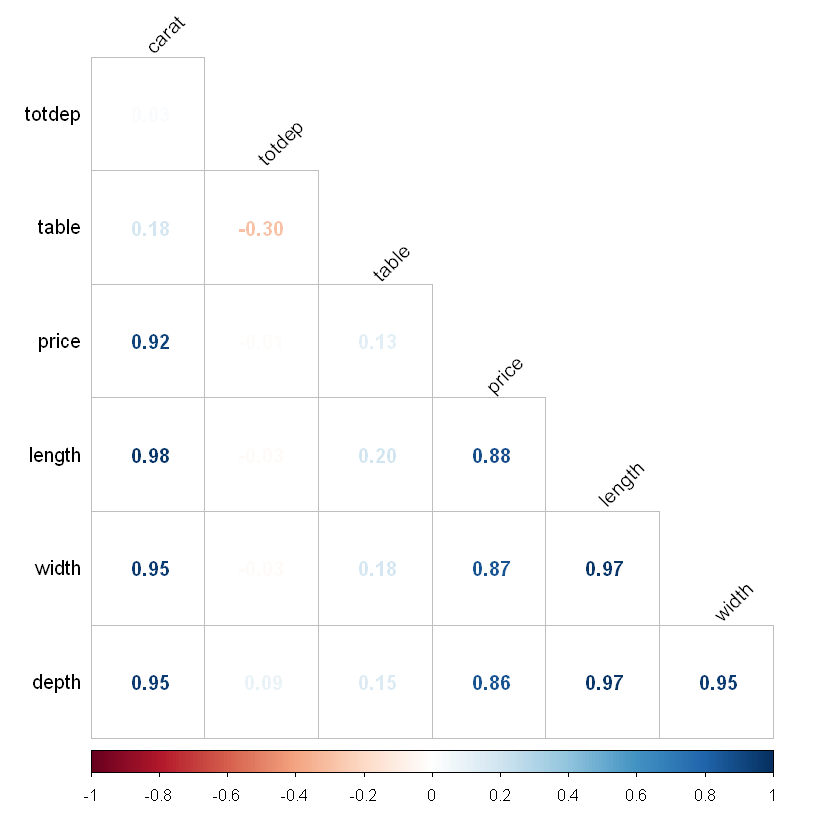

In [10]:
library(corrplot)
cont.cor<-cor(cont) 
corrplot(cont.cor, method="number",  type = "lower" ,addCoef.col = "black" ,  tl.col = "black", tl.srt = 45, diag = F) 

1. `length(8)`, `width'(9)`, `depth'(10)` All three vars are highly correlated ➡️ PCA
2. `carat` is an important variable (Also, According to the domain too)

### Distribution

In [16]:
library(magrittr)
library(dplyr)
library(tidyverse)
library(viridis)

In [23]:
install.packages("hrbrthemes")
library(hrbrthemes)

also installing the dependencies 'extrafontdb', 'Rttf2pt1', 'systemfonts', 'extrafont', 'gdtools'




  There are binary versions available but the source versions are later:
            binary source needs_compilation
Rttf2pt1     1.3.8 1.3.10              TRUE
systemfonts  1.0.2  1.0.4              TRUE
extrafont     0.17   0.18             FALSE
gdtools      0.2.3  0.2.4              TRUE

  Binaries will be installed
package 'extrafontdb' successfully unpacked and MD5 sums checked
package 'Rttf2pt1' successfully unpacked and MD5 sums checked
package 'systemfonts' successfully unpacked and MD5 sums checked
package 'gdtools' successfully unpacked and MD5 sums checked
package 'hrbrthemes' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\alsdu\AppData\Local\Temp\Rtmp4S5o9W\downloaded_packages


installing the source package 'extrafont'

Warning message:
"package 'hrbrthemes' was built under R version 3.6.3"NOTE: Either Arial Narrow or Roboto Condensed fonts are required to use these themes.
      Please use hrbrthemes::import_roboto_condensed() to install Roboto Condensed and
      if Arial Narrow is not on your system, please see https://bit.ly/arialnarrow


In [18]:
df<-as.data.frame(diamonds)

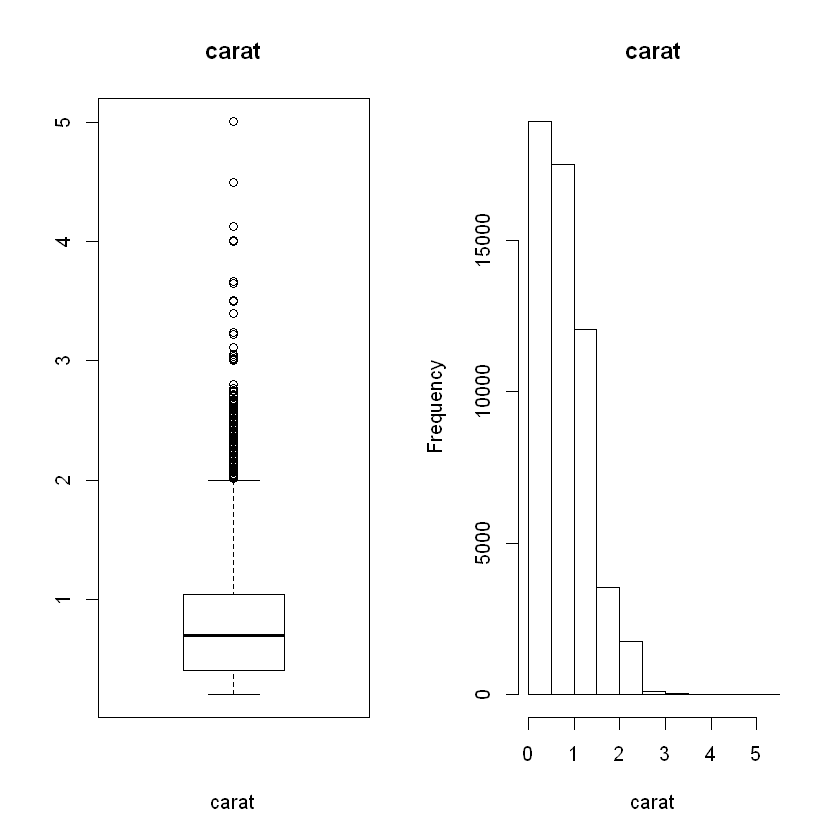

In [29]:
#'carat'(1)
par(mfcol=c(1,2))
boxplot(df[,1],main=names(df)[1], xlab=names(df)[1])
hist(df[,1], main=names(df)[1], xlab=names(df)[1] )

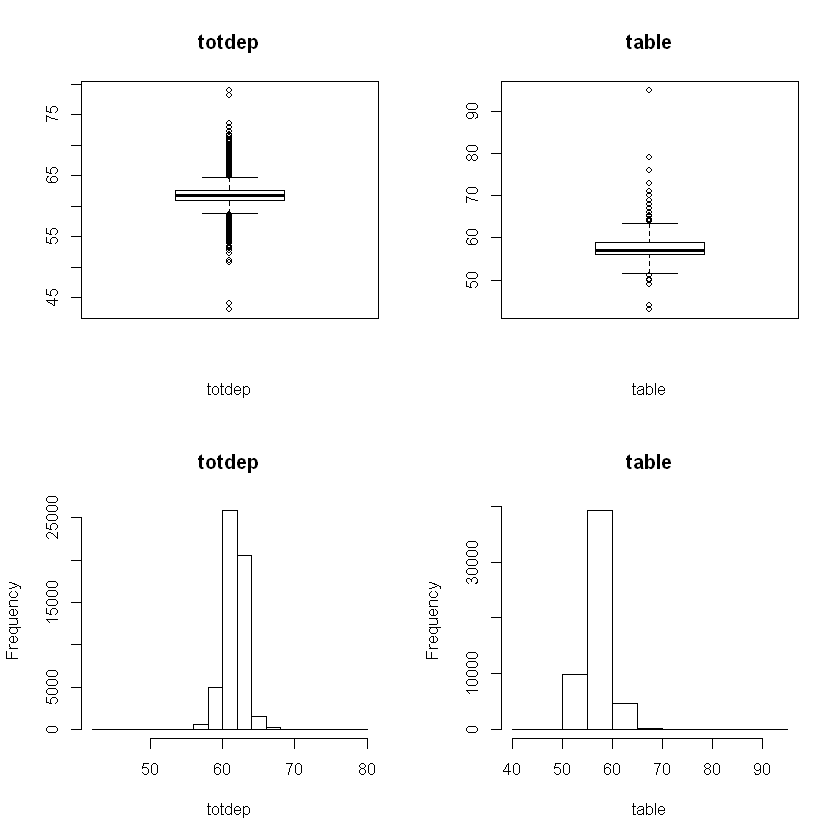

In [30]:
# , 'totdep'(5), 'table'(6)
par(mfcol=c(2,2))
for (j in 5:6) { 
boxplot(df[,j] , main=names(df)[j],  xlab=names(df)[j] )  
hist(df[,j] , main=names(df)[j] , xlab=names(df)[j] )
}

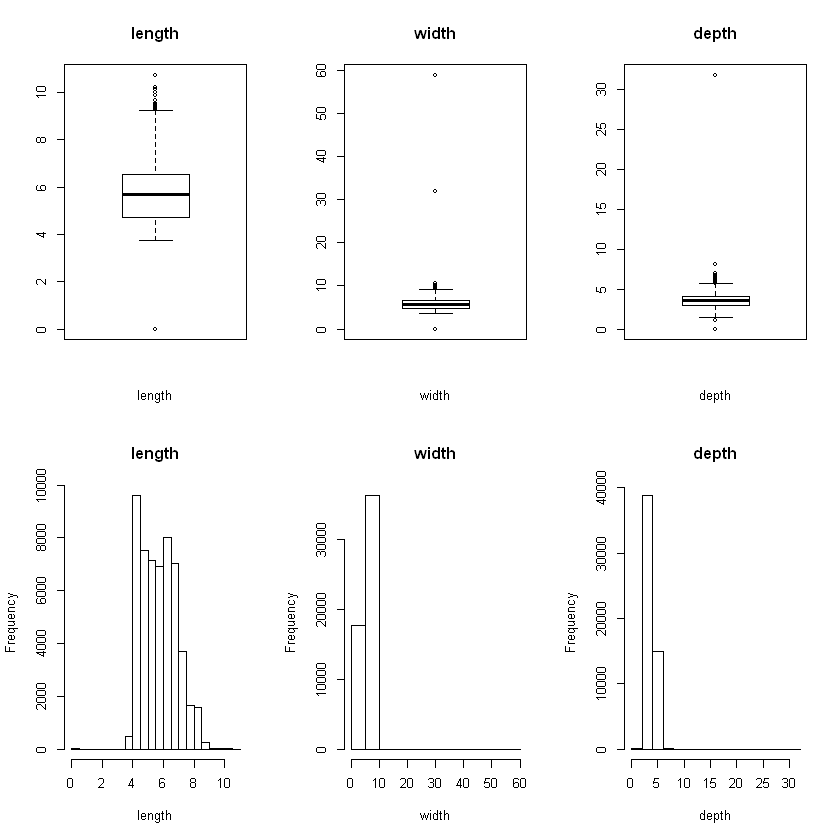

In [31]:
#'length'(8), 'width'(9), 'depth'(10)
par(mfcol=c(2,3))
for (j in 8:10) { 
boxplot(df[,j] , main=names(df)[j],  xlab=names(df)[j] )  
hist(df[,j] , main=names(df)[j] , xlab=names(df)[j] )
}

### Categorical variables EDA
- cut(2)        color(3)        clarity(4) 

In [32]:
library(gridExtra)

Warning message:
"package 'gridExtra' was built under R version 3.6.3"
Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine



#### Barplots

In [33]:
plotHist <- function(data_in, i) {
  data <- data.frame(x=data_in[[i]])
  p <- ggplot(data=data, aes(x=factor(x))) + stat_count() + xlab(colnames(data_in)[i]) + theme_light() + 
    theme(axis.text.x = element_text(angle = 90, hjust =1))
  return (p)
}

In [34]:
doPlots <- function(data_in, fun, ii, ncol=3) {
  pp <- list()
  for (i in ii) {
    p <- fun(data_in=data_in, i=i)
    pp <- c(pp, list(p))
  }
  do.call("grid.arrange", c(pp, ncol=ncol))
}

In [35]:
par(mfcol=c(1,3))

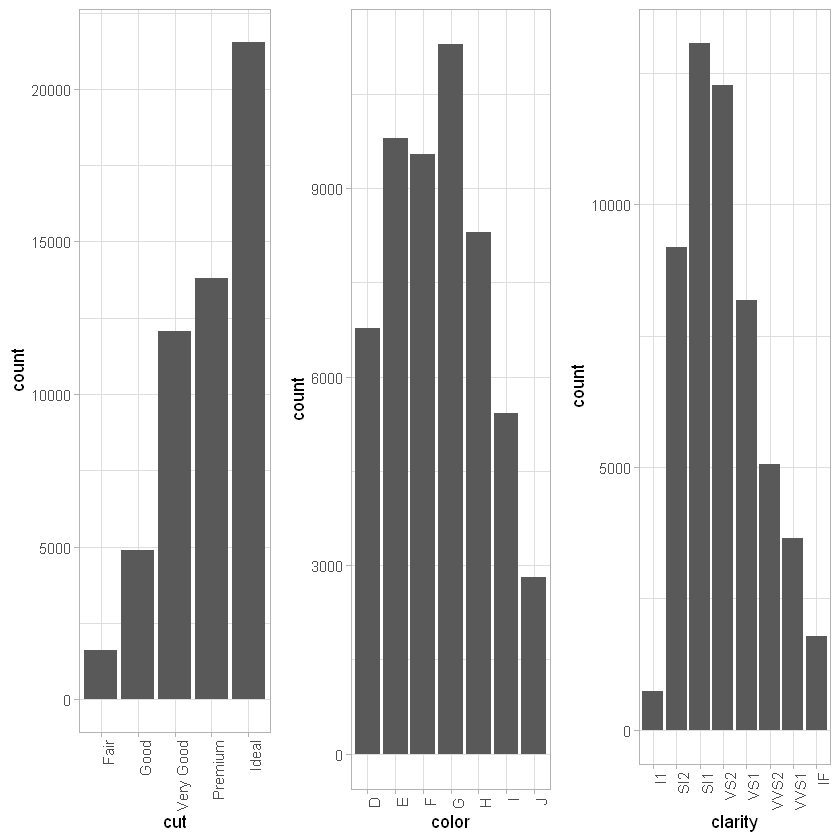

In [36]:
doPlots(df, fun = plotHist, ii = 2:4)

#### Violin & pie

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"윈도우즈 폰트데이터베이스에서 찾을 수 없는 폰트페밀리입니다"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"윈도우즈 폰트데이터베이스에서 찾을 수 없는 폰트페밀리입니다"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"윈도우즈 폰트데이터베이스에서 찾을 수 없는 폰트페밀리입니다"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"윈도우즈 폰트데이터베이스에서 찾을 수 없는 폰트페밀리입니다"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"윈도우즈 폰트데이터베이스에서 찾을 수 없는 폰트페밀리입니다"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"윈도우즈 폰트데이터베이스에서 찾을 수 없는 폰트페밀리입니다"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"윈도우즈 폰트데이터베이스에서 찾을 수 없는 폰트페밀리입니다"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"윈도우즈 폰트데이터베이스에서 찾을 수 없는 폰트페밀리입니다"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$

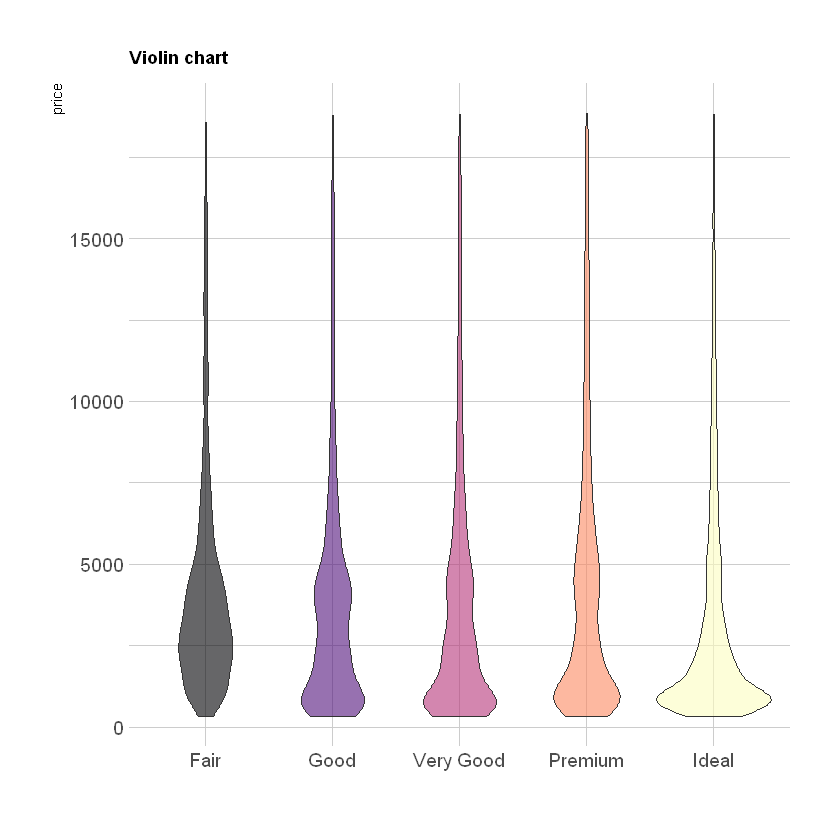

In [37]:
# cut(2)
df %>%
  ggplot( aes(x=cut, y=price, fill=cut)) +
    geom_violin() +
    scale_fill_viridis(discrete = TRUE, alpha=0.6, option="A") +
    theme_ipsum() +
    theme(
      legend.position="none",
      plot.title = element_text(size=11)
    ) +
    ggtitle("Violin chart") +
    xlab("")

In [45]:
# Prepare a color palette. Here with R color brewer
library(RColorBrewer)
myPalette <- brewer.pal(5, "Set2") 


     Fair      Good Very Good   Premium     Ideal 
     2.98      9.10     22.40     25.57     39.95 

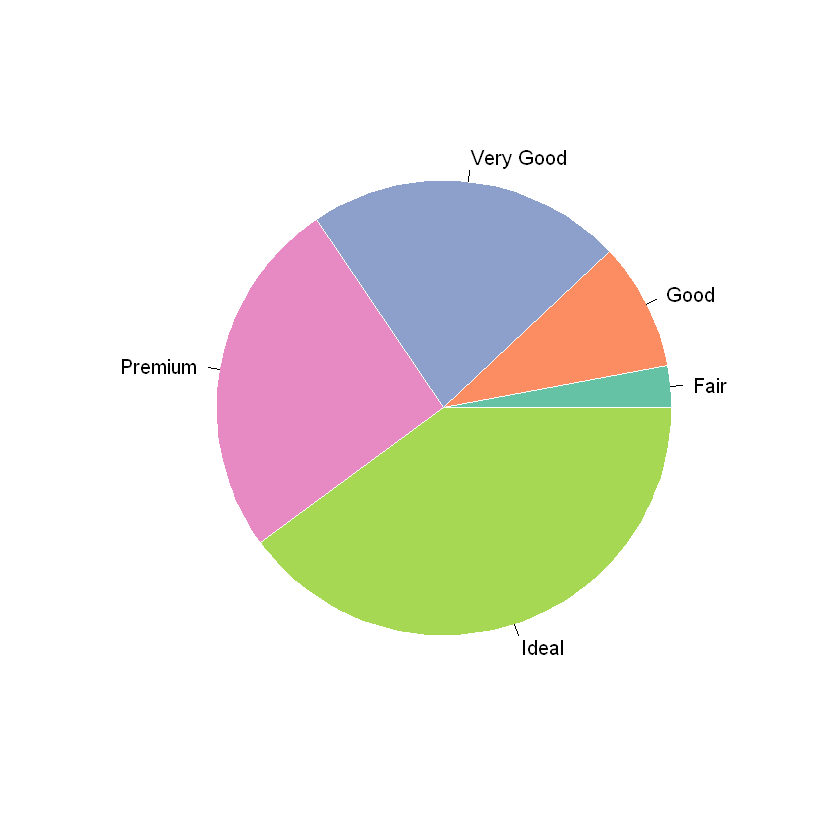

In [46]:
pie( round( prop.table( table(df[,2]) ) *100, 2), labels=c("Fair","Good","Very Good","Premium","Ideal"),border="white", col=myPalette) 
round( prop.table( table(df[,2]) ) *100, 2)

-**Fair**
- Except for this, the distribution to the 'target' is similar.
- It has the smallest proportion.(2.98%)

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"윈도우즈 폰트데이터베이스에서 찾을 수 없는 폰트페밀리입니다"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"윈도우즈 폰트데이터베이스에서 찾을 수 없는 폰트페밀리입니다"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"윈도우즈 폰트데이터베이스에서 찾을 수 없는 폰트페밀리입니다"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"윈도우즈 폰트데이터베이스에서 찾을 수 없는 폰트페밀리입니다"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"윈도우즈 폰트데이터베이스에서 찾을 수 없는 폰트페밀리입니다"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"윈도우즈 폰트데이터베이스에서 찾을 수 없는 폰트페밀리입니다"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"윈도우즈 폰트데이터베이스에서 찾을 수 없는 폰트페밀리입니다"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"윈도우즈 폰트데이터베이스에서 찾을 수 없는 폰트페밀리입니다"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$

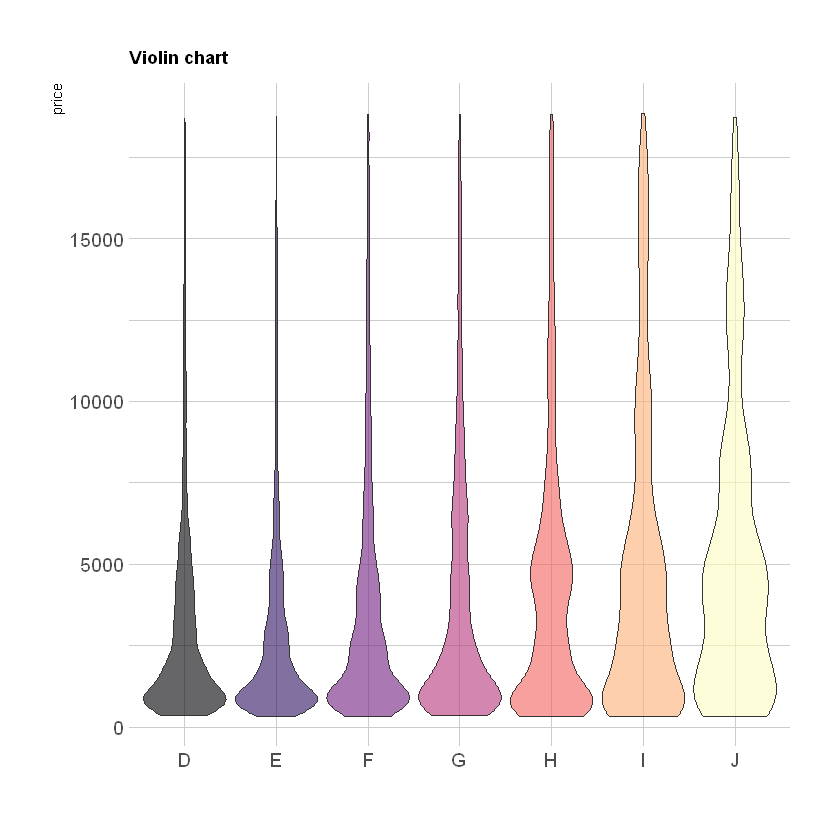

In [50]:
# color(3)
df %>%
  ggplot( aes(x=color, y=price, fill=color)) +
    geom_violin(scale='width') +
    scale_fill_viridis(discrete = TRUE, alpha=0.6, option="A") +
    theme_ipsum() +
    theme(
      legend.position="none",
      plot.title = element_text(size=11)
    ) +
    ggtitle("Violin chart") +
    xlab("")

In [52]:
myPalette2<- brewer.pal(7, "Set2") 


    D     E     F     G     H     I     J 
12.56 18.16 17.69 20.93 15.39 10.05  5.21 

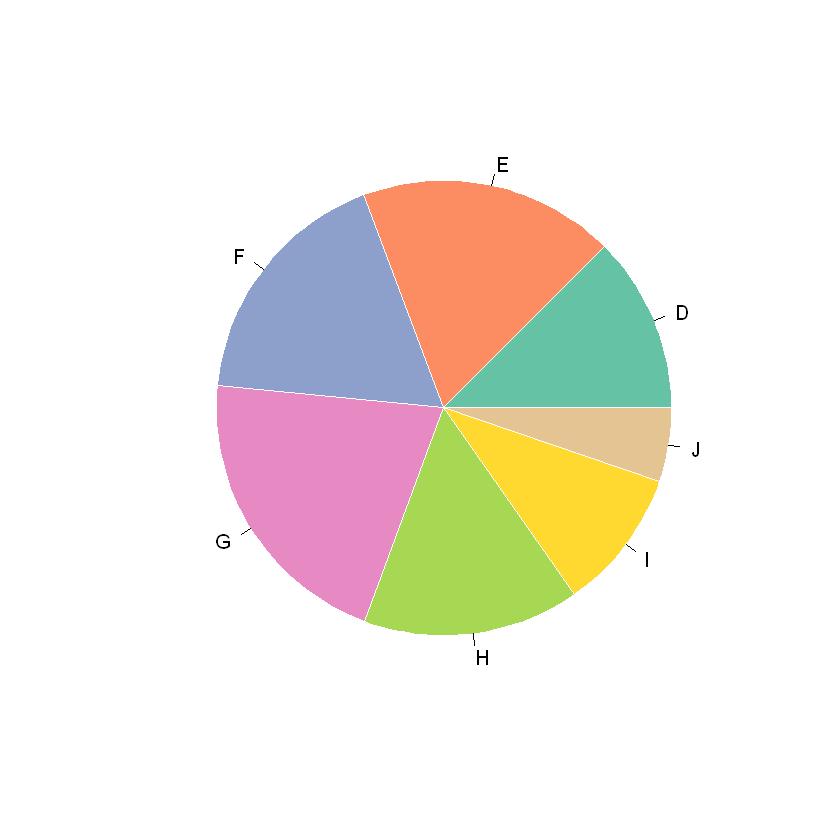

In [53]:
pie( round( prop.table( table(df[,3]) ) *100, 2), labels=c("D","E","F","G","H","I","J"),border="white", col=myPalette2) 
round( prop.table( table(df[,3]) ) *100, 2)

-      **I(10.05)**, **J(5.21)**

- Except for these two vars, the distribution to the 'target' is similar.
- Each of these has the smallest proportion.

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"윈도우즈 폰트데이터베이스에서 찾을 수 없는 폰트페밀리입니다"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"윈도우즈 폰트데이터베이스에서 찾을 수 없는 폰트페밀리입니다"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"윈도우즈 폰트데이터베이스에서 찾을 수 없는 폰트페밀리입니다"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"윈도우즈 폰트데이터베이스에서 찾을 수 없는 폰트페밀리입니다"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"윈도우즈 폰트데이터베이스에서 찾을 수 없는 폰트페밀리입니다"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"윈도우즈 폰트데이터베이스에서 찾을 수 없는 폰트페밀리입니다"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"윈도우즈 폰트데이터베이스에서 찾을 수 없는 폰트페밀리입니다"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"윈도우즈 폰트데이터베이스에서 찾을 수 없는 폰트페밀리입니다"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$

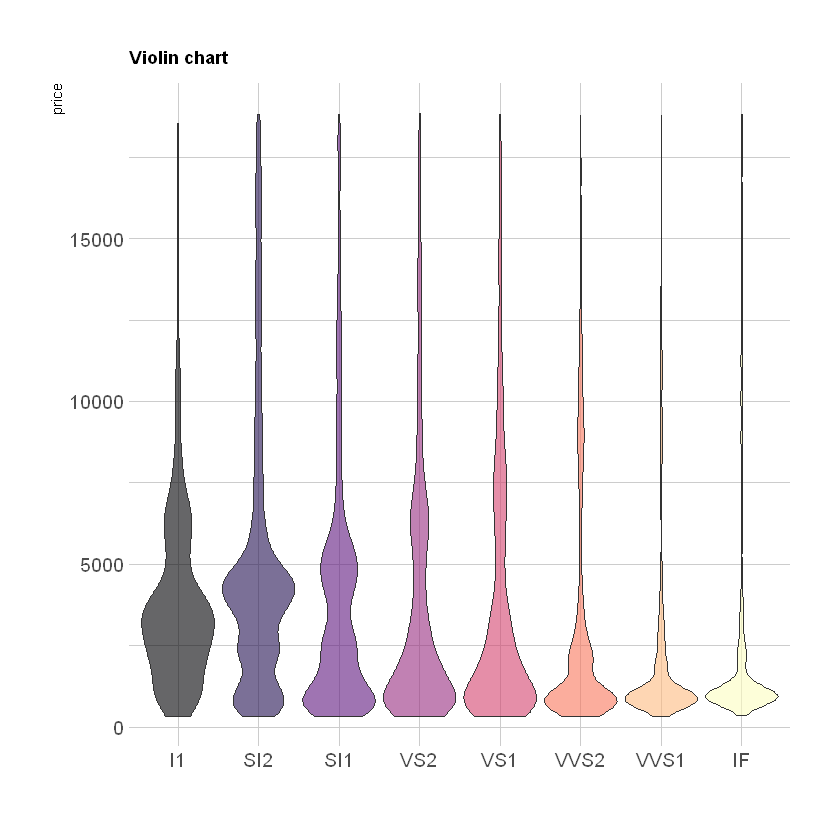

In [55]:
# clarity(4)
df %>%
  ggplot( aes(x=clarity, y=price, fill=clarity)) +
    geom_violin(scale='width') +
    scale_fill_viridis(discrete = TRUE, alpha=0.6, option="A") +
    theme_ipsum() +
    theme(
      legend.position="none",
      plot.title = element_text(size=11)
    ) +
    ggtitle("Violin chart") +
    xlab("")


   I1   SI2   SI1   VS2   VS1  VVS2  VVS1    IF 
 1.37 17.04 24.22 22.73 15.15  9.39  6.78  3.32 

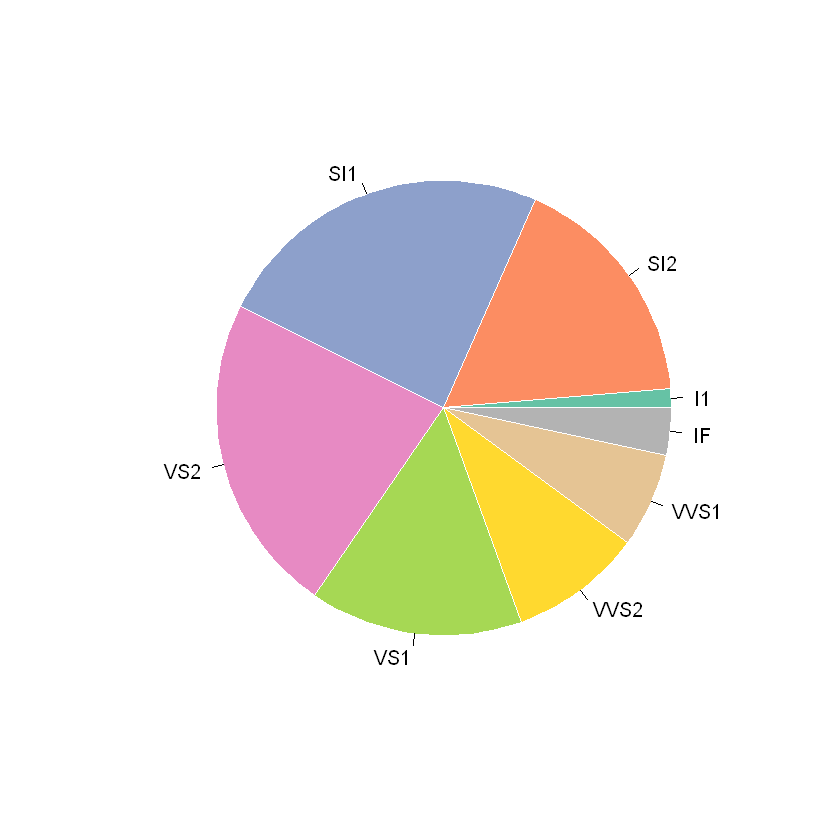

In [56]:
myPalette3<- brewer.pal(8, "Set2") 
pie( round( prop.table( table(df[,4]) ) *100, 2), labels=c("I1","SI2","SI1","VS2","VS1","VVS2","VVS1","IF" ),border="white", col=myPalette3) 
round( prop.table( table(df[,4]) ) *100, 2)


1. If its class is convted to the 'num', I think it'll be a normal distribution. 
2. The distribution of high grades (VVS2, VVS1, IF) is different compared to lower grades.